___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [2]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.rcParams["figure.figsize"] = (10, 6)
# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)


In [5]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [5]:
tf.__version__

'2.14.0'

In [6]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
from tensorflow import keras
SEED = 42
keras.utils.set_random_seed(SEED)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [7]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
print(f"There are {len(x_train)} images in the training dataset")
print(f"There are {len(x_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [9]:
# Checking the shape of one image
x_train[70].shape
# grayscale images ,one channel 0-255

(28, 28)

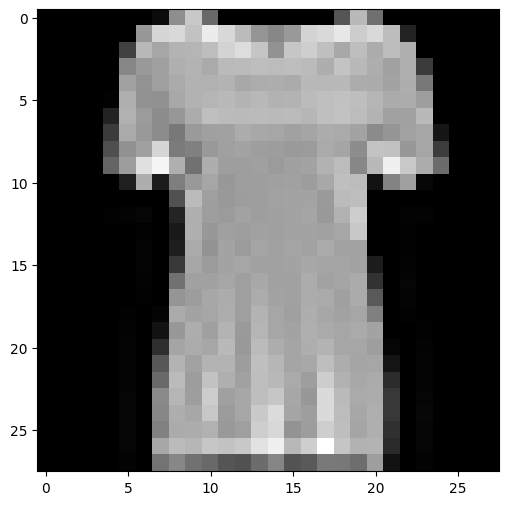

In [10]:
plt.imshow(x_train[10], cmap="gray")
#plot one image which is 10 it represent a T-shirt

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**


    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

In [11]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

<Axes: >

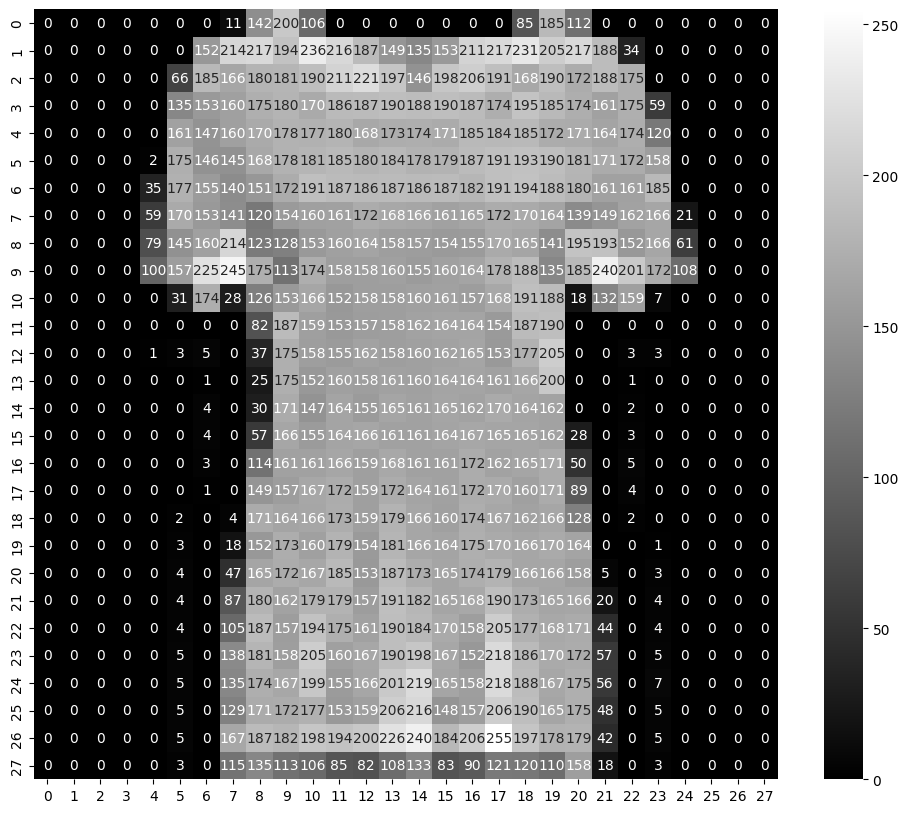

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(x_train[10], annot=True, cmap="gray", fmt=".3g")
#plot with the actual values of pixels
# using heat map

<Axes: >

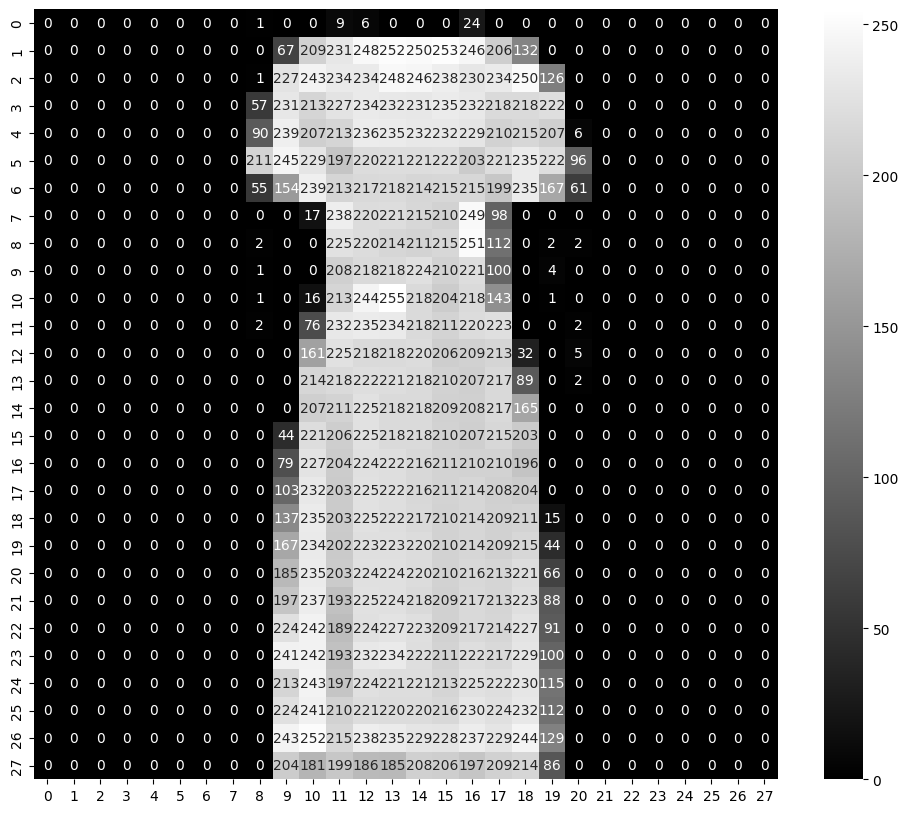

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(x_train[50], annot=True, cmap="gray", fmt=".3g")
#plot with the actual values of pixels
# using heat map

In [13]:
len(x_train[50000])
# The dimention of the image 50000

28

In [14]:
y_train
# the actual labels for the images it's pandas series

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
# the label of image 54 is 2 meaning it's "Pullover"
y_train[54]


2

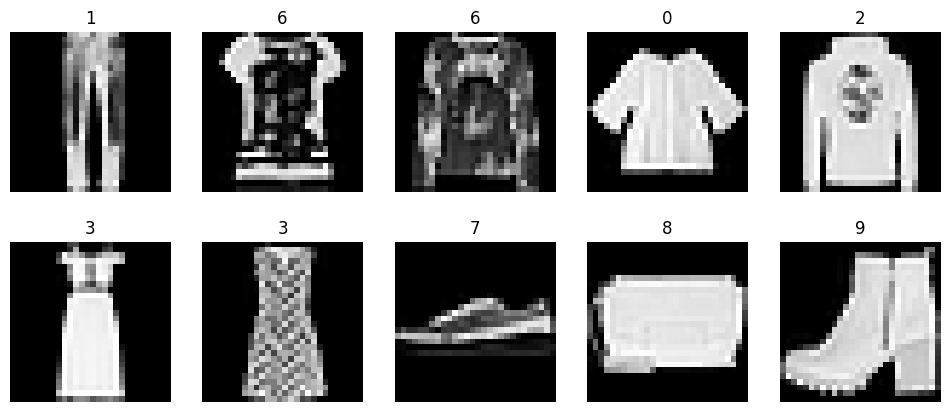

In [18]:
# plot randomely selected data points with thier labels
f, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax in axes.ravel():
    idx = np.random.randint(0, len(x_train))
    ax.axis("off")
    ax.set_title(y_train[idx])
    ax.imshow(x_train[idx], cmap="gray")
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

Identify the range of the data set

In [19]:
# The range starts from the minimum value
x_train[800].min()
# range of any the data points
#starts with 0 to 255
# 0 --> black
#255 --> white

0

In [20]:
# The range ends to the maximum value
x_train[46].max()

255

In [22]:
# Normalize image pixels
# it's good to normalize the data set from 0-1
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
# if we divide the whole range dataset by 255 we will have data range from 0-1
x_train /= 255
x_test /= 255

After implement The Normalization

In [24]:
x_train[876].min()

0.0

In [25]:
x_train[9853].max()

1.0

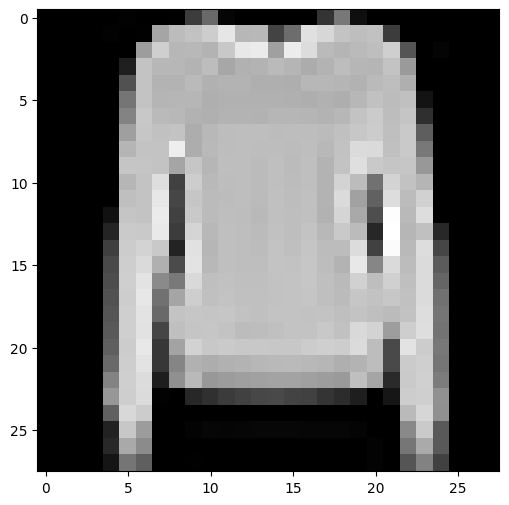

In [26]:
plt.imshow(x_train[9853], cmap="gray")
plt.show()
#image stay the same after the normalization

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [27]:
# the shape of the train and test data set
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [28]:
# expand the dimension by one just to represent it has grayscale of 1
np.expand_dims(x_train, 3).shape

(60000, 28, 28, 1)

In [29]:
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)
# Expand only one channel

Shape of the dataset After expand the Dimension

In [30]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [31]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [33]:
from tensorflow.keras.utils import to_categorical

In [34]:
# change y of TRAIN | TEST to be Categorical value and
# because in the modeling the dense layer give the highest probabitity of the output
Y_train_cat = to_categorical(y_train, 10)# categorical feature of dimension of 10 (10 labels) have one hot encoding
Y_test_cat = to_categorical(y_test, 10)
Y_train_cat.shape
# instead of having 1 dimension , will have 10 different dimension

(60000, 10)

In [38]:
#before Encoded values using one-hot Encoder
y_train[68]

4

In [37]:
# After Encoded values using one-hot Encoder
Y_train_cat[57]
# one hot encoded of value 8
# one at 8 , 0 for the rest
# Which is Represent Bag

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

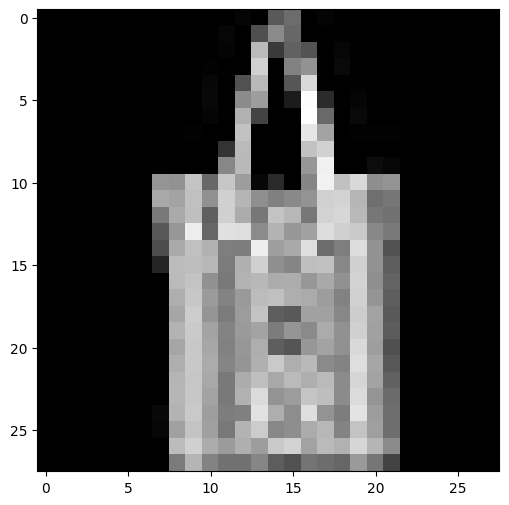

In [40]:
# Plotting the Bag image
plt.imshow(x_train[57], cmap="gray")
plt.show()
#image stay the same after the one hot encoding

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [42]:
x_train[1].shape

(28, 28, 1)

In [72]:
model = Sequential()

model.add( Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))  # stride = 1, padding = valid

model.add(MaxPool2D(pool_size=(2, 2)))  # stride = pool size, padding = valid --> no padding

model.add(Flatten())# flatten the output and make it ready for the next layer

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))#ouput layer have 10 different neurons represent the 10 different labels of the dataset
#, softmax to find which label it's

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
#multiclass --> loss="categorical_crossentropy"

In [44]:
model.summary()
# 28 diffirent filters --> output shape (26,26,28) with 280 parameters
# with MaxPooling2D --> Minimize the output shape with 1 stride to become  ( 13, 13, 28)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607394 (2.32 MB)
Trainable params: 607394 (2.32 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

Early Stopping

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=4, restore_best_weights=True)
#monitor val-loss and mainimaizing it
# if it's stopp to deccrease --> early stopping

In [48]:
# Making the Validation set from the training set
from sklearn.model_selection import train_test_split
x_train, x_val, Y_train_cat, Y_val_cat = train_test_split(x_train,Y_train_cat,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=SEED)

In [50]:
model.fit(
    x_train,
    Y_train_cat,
    batch_size=64,
    epochs=100,
    validation_data=(x_val,Y_val_cat),
    callbacks=[early_stop],
)
#early stopping at 10 epochs

Epoch 1/100
844/844 [==============================] - 13s 5ms/step - loss: 0.4634 - accuracy: 0.8332 - val_loss: 0.3184 - val_accuracy: 0.8862
Epoch 2/100
844/844 [==============================] - 3s 4ms/step - loss: 0.2992 - accuracy: 0.8933 - val_loss: 0.2850 - val_accuracy: 0.8972
Epoch 3/100
844/844 [==============================] - 3s 4ms/step - loss: 0.2524 - accuracy: 0.9076 - val_loss: 0.2506 - val_accuracy: 0.9083
Epoch 4/100
844/844 [==============================] - 3s 4ms/step - loss: 0.2205 - accuracy: 0.9190 - val_loss: 0.2466 - val_accuracy: 0.9068
Epoch 5/100
844/844 [==============================] - 5s 6ms/step - loss: 0.1973 - accuracy: 0.9283 - val_loss: 0.2578 - val_accuracy: 0.9040
Epoch 6/100
844/844 [==============================] - 3s 4ms/step - loss: 0.1770 - accuracy: 0.9355 - val_loss: 0.2287 - val_accuracy: 0.9227
Epoch 7/100
844/844 [==============================] - 3s 4ms/step - loss: 0.1591 - accuracy: 0.9417 - val_loss: 0.2359 - val_accuracy: 0.915

In [51]:
model.metrics_names

['loss', 'accuracy']

**TASK 7: Plot values of metrics you used in your model.**

In [52]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.463370,0.833204,0.318400,0.886167
1,0.299192,0.893333,0.284955,0.897167
2,0.252390,0.907630,0.250570,0.908333
3,0.220544,0.919019,0.246599,0.906833
4,0.197311,0.928296,0.257790,0.904000


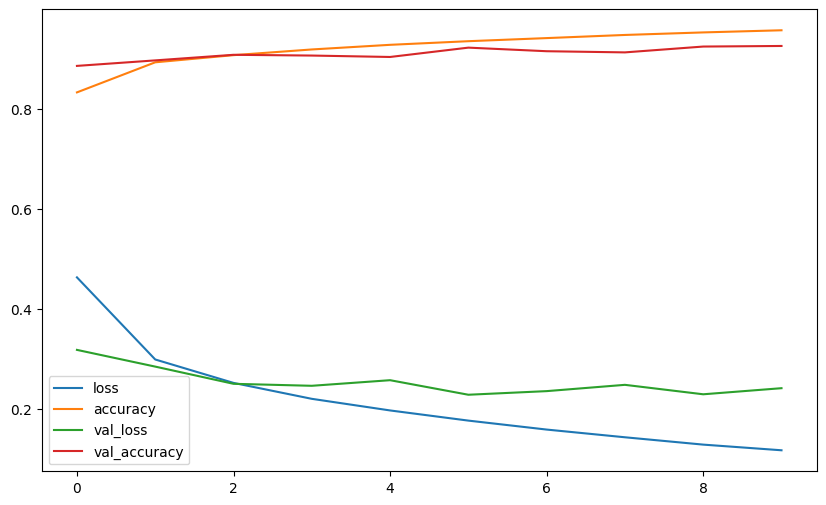

In [53]:
summary.plot();
# the accuracy very high with one conv2D layer ftom the begining
# there is overfitting
# even after implement early stopping to monitor the val-loss

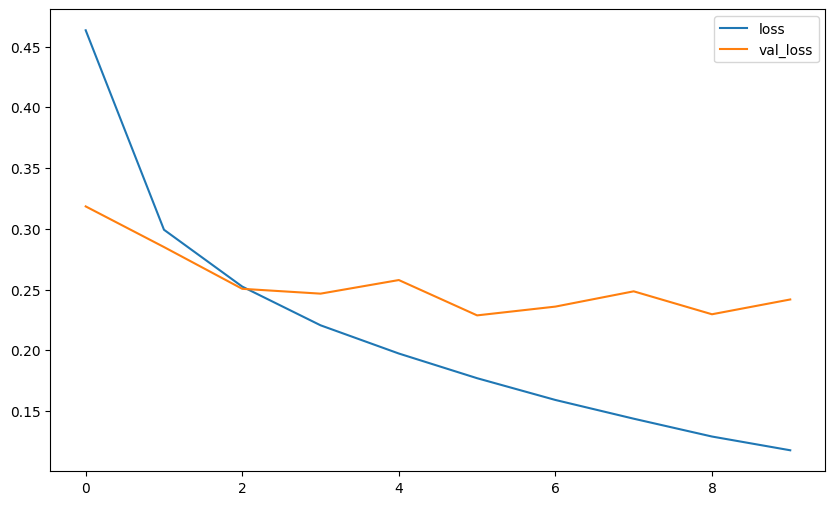

In [54]:
summary[["loss", "val_loss"]].plot();

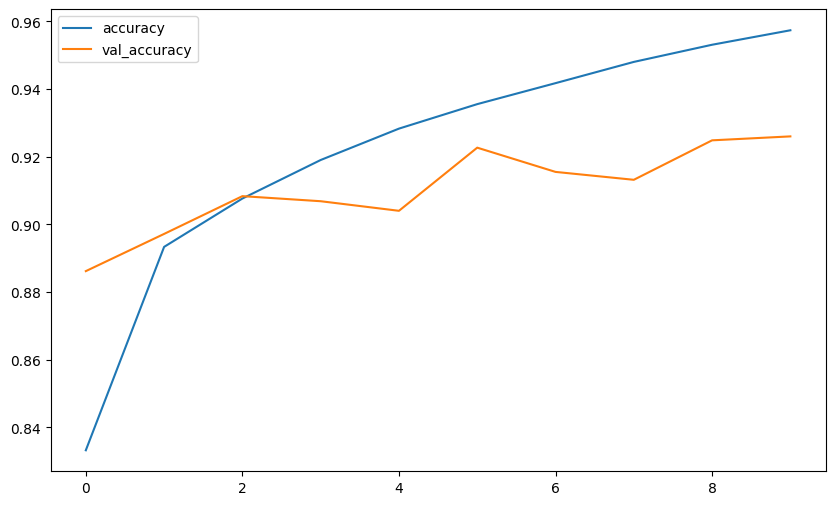

In [55]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [56]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [57]:
# Evaluate the model on the test set
model.evaluate(x_test, Y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.2612 - accuracy: 0.9100


[0.2612071633338928, 0.9100000262260437]

In [58]:
score = model.evaluate(x_test, Y_test_cat, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2612071633338928
Test accuracy: 0.9100000262260437


In [59]:
pred_prob = model.predict(x_test)
pred_prob
# the probability is in 10 digits

313/313 [==============================] - 1s 2ms/step


array([[8.12971592e-08, 5.66713176e-10, 1.67200824e-07, ...,
        7.41464668e-04, 1.04951653e-06, 9.99199688e-01],
       [1.12647385e-05, 2.09902455e-14, 9.99603331e-01, ...,
        4.85688638e-13, 2.48292012e-11, 1.74227139e-14],
       [1.22169580e-10, 1.00000000e+00, 2.11265606e-11, ...,
        8.13021109e-11, 2.99583192e-10, 2.46369813e-10],
       ...,
       [1.46843490e-06, 5.44626085e-13, 1.64088749e-06, ...,
        8.62321883e-07, 9.99981999e-01, 4.18479335e-10],
       [8.51197723e-10, 9.99999881e-01, 1.45945880e-10, ...,
        3.74658464e-11, 1.62044735e-11, 1.09376934e-08],
       [1.93078420e-04, 3.64010020e-07, 3.15786991e-03, ...,
        4.59310599e-02, 6.44686911e-03, 6.05039648e-04]], dtype=float32)

In [60]:
pred_prob.shape # the shape of the probability

(10000, 10)

In [61]:
pred_prob[56]
# The highest Probability is  9.99995112e-01 which represent the label 8

array([8.88222473e-08, 2.55252181e-10, 1.56563416e-07, 6.15606455e-10,
       2.97184211e-09, 1.03140205e-11, 4.59920921e-06, 8.45029291e-09,
       9.99995112e-01, 5.41186074e-09], dtype=float32)

In [62]:
np.argmax(pred_prob[56])
# to give the highest probability among all probability of the above array
# to give you the index of highest Probability

8

In [63]:
y_pred = np.argmax(pred_prob, axis=1)# to get the actual class of the probabilities
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [64]:
y_pred.shape

(10000,)

Classification Report

In [65]:
print(classification_report(y_test, y_pred))
# Amazing Results
# the lowest Recall is 80 for label 2
# the lowest precision is 70 for label 6

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.92      0.80      0.85      1000
           3       0.93      0.90      0.91      1000
           4       0.83      0.89      0.86      1000
           5       0.98      0.97      0.98      1000
           6       0.70      0.82      0.75      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Confusion Matrix

In [66]:
print(confusion_matrix(y_test, y_pred))
# thereare misclassified for label 0 and 2

[[837   0   6  12   4   2 134   0   4   1]
 [  1 981   0  10   3   0   4   0   1   0]
 [ 13   1 795   9  79   1 102   0   0   0]
 [ 10   3   6 898  43   0  39   0   1   0]
 [  0   0  22  15 889   0  73   0   1   0]
 [  0   0   0   0   0 972   0  16   0  12]
 [ 81   0  29  17  50   0 818   0   5   0]
 [  0   0   0   0   0   5   0 959   1  35]
 [  3   0   2   3   2   2   3   4 981   0]
 [  0   0   0   0   0   5   1  24   0 970]]


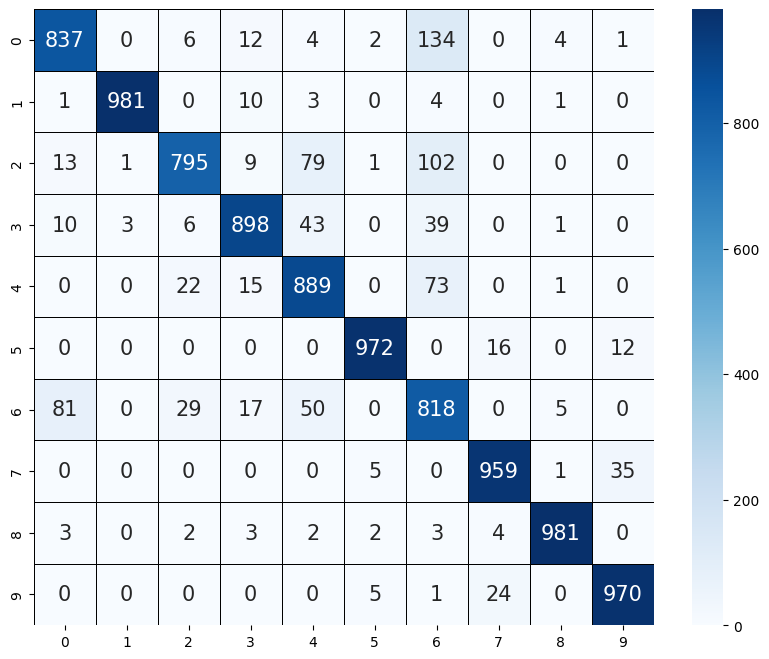

In [135]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()
# heat map of confusion matrix

How many mistakes for Model 1?

In [67]:
np.not_equal(y_test, y_pred).sum()#how many mistakes the model did

900

In [68]:
# The correct prediction
np.equal(y_test, y_pred).sum()#not mistake

9100

# **Model with Dropout**

build the same model but now with dropout

In [70]:
from tensorflow.keras.layers import Dropout

In [98]:
model2 = Sequential()

model2.add( Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))  # stride = 1, padding = valid

model2.add(MaxPool2D(pool_size=(2, 2)))  # stride = pool size, padding = valid --> no padding
model2.add(Flatten())# flatten the output and make it ready for the next layer

model2.add(Dense(128, activation="relu"))
model2.add(Dropout(0.6))# dropout

model2.add(Dense(10, activation="softmax"))#ouput layer have 10 different neurons represent the 10 different labels of the dataset
#, softmax to find which label it's

model2.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
#multiclass --> loss="categorical_crossentropy"

In [99]:
model2.summary()
# 28 diffirent filters --> output shape (26,26,28) with 280 parameters
# with MaxPooling2D --> Minimize the output shape with 1 stride to become  ( 13, 13, 28)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 4732)              0         
                                                                 
 dense_13 (Dense)            (None, 128)               605824    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                      

In [100]:
model2.fit(
    x_train,
    Y_train_cat,
    batch_size=64,
    epochs=100,
    validation_data=(x_val,Y_val_cat),
    callbacks=[early_stop],
)
#early stopping at 15 epochs

Epoch 1/100
844/844 [==============================] - 4s 4ms/step - loss: 0.5955 - accuracy: 0.7963 - val_loss: 0.3352 - val_accuracy: 0.8798
Epoch 2/100
844/844 [==============================] - 4s 4ms/step - loss: 0.3973 - accuracy: 0.8628 - val_loss: 0.2945 - val_accuracy: 0.8973
Epoch 3/100
844/844 [==============================] - 4s 5ms/step - loss: 0.3590 - accuracy: 0.8755 - val_loss: 0.2796 - val_accuracy: 0.8990
Epoch 4/100
844/844 [==============================] - 3s 4ms/step - loss: 0.3403 - accuracy: 0.8804 - val_loss: 0.2750 - val_accuracy: 0.9038
Epoch 5/100
844/844 [==============================] - 3s 4ms/step - loss: 0.3240 - accuracy: 0.8862 - val_loss: 0.2751 - val_accuracy: 0.9018
Epoch 6/100
844/844 [==============================] - 4s 5ms/step - loss: 0.3166 - accuracy: 0.8889 - val_loss: 0.2643 - val_accuracy: 0.9107
Epoch 7/100
844/844 [==============================] - 3s 4ms/step - loss: 0.3082 - accuracy: 0.8929 - val_loss: 0.2559 - val_accuracy: 0.9095

In [101]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.595499,0.796296,0.335197,0.879833
1,0.397321,0.862815,0.294482,0.897333
2,0.358956,0.875537,0.279598,0.899000
3,0.340326,0.880389,0.274954,0.903833
4,0.324001,0.886241,0.275063,0.901833


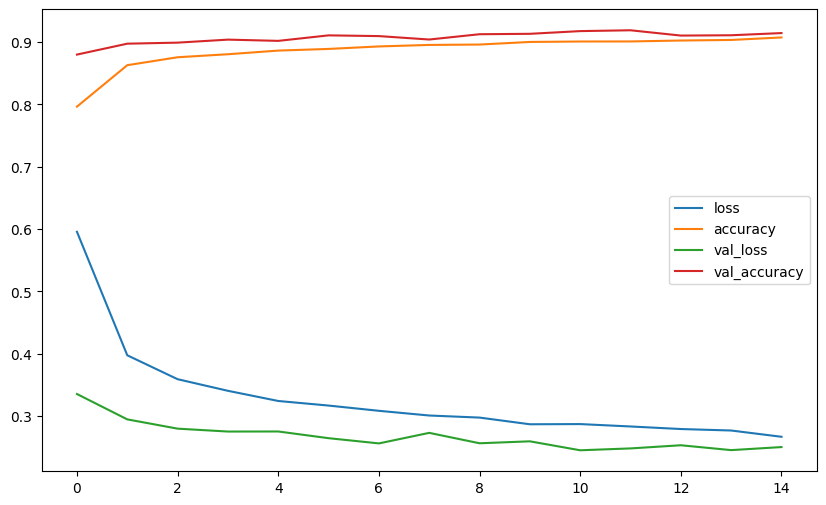

In [102]:
summary.plot();
# The accuracy very high with one conv2D layer ftom the begining
# There is NO overfitting

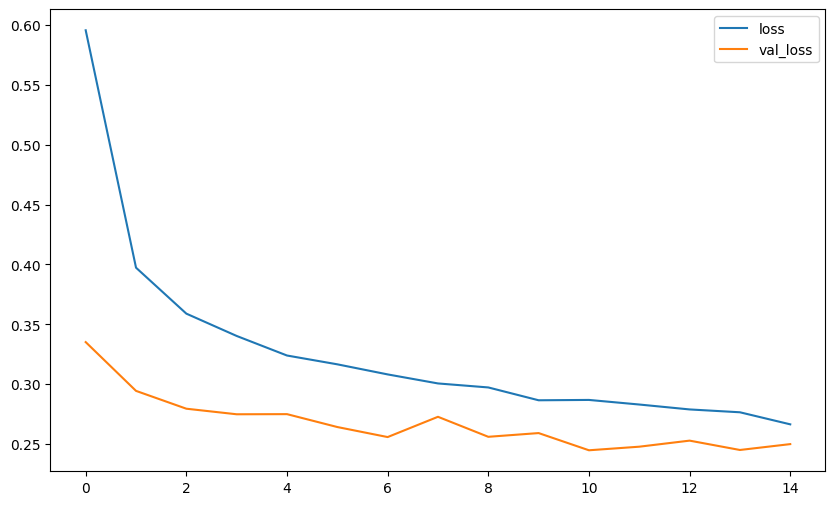

In [103]:
summary[["loss", "val_loss"]].plot();

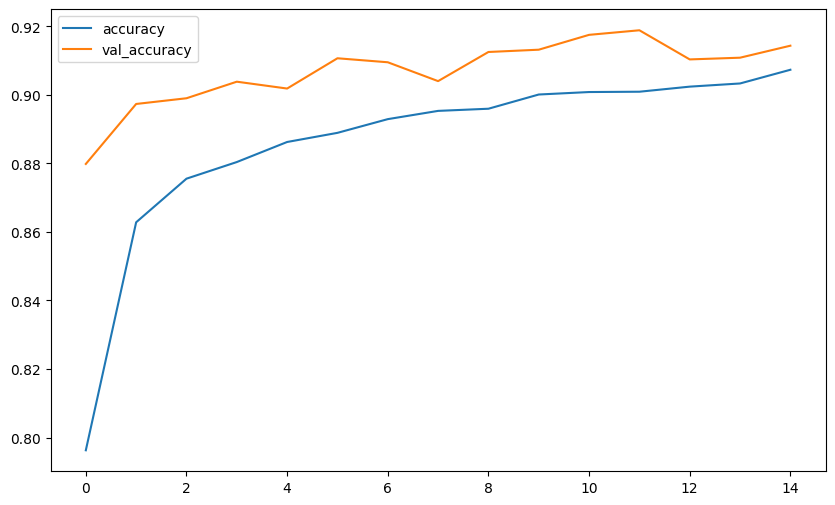

In [104]:
summary[["accuracy", "val_accuracy"]].plot();

**`Model Evaluation`**

In [105]:
# Evaluate the model on the test set
model2.evaluate(x_test, Y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.2802 - accuracy: 0.9029


[0.28022027015686035, 0.902899980545044]

In [106]:
score = model2.evaluate(x_test, Y_test_cat, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.28022027015686035
Test accuracy: 0.902899980545044


In [107]:
pred_prob2 = model2.predict(x_test)
pred_prob2
# the probability is in 10 digits

313/313 [==============================] - 1s 2ms/step


array([[3.3021184e-08, 5.3625204e-10, 6.5308066e-09, ..., 4.0129697e-04,
        2.4032704e-06, 9.9936658e-01],
       [1.8355531e-07, 1.4763717e-15, 9.9999630e-01, ..., 9.7853261e-15,
        4.5043080e-10, 1.9509613e-14],
       [1.2256290e-09, 1.0000000e+00, 1.3293639e-11, ..., 1.0825477e-11,
        2.2597299e-10, 7.1892627e-13],
       ...,
       [1.1710565e-07, 1.3800454e-15, 5.4276907e-09, ..., 1.4995767e-12,
        9.9999952e-01, 9.7013075e-14],
       [1.9296108e-10, 9.9999952e-01, 8.3809426e-12, ..., 1.0655946e-12,
        3.0084912e-10, 6.5590961e-12],
       [5.4079661e-05, 1.8128934e-05, 1.0938716e-04, ..., 2.8851863e-02,
        1.6990959e-03, 2.4820860e-03]], dtype=float32)

In [109]:
pred_prob2[56]
# The highest Probability is 9.9999726e-01 which represent the label 8

array([4.6014455e-07, 7.0945544e-10, 7.4457930e-08, 9.5570041e-10,
       4.0000967e-09, 3.3338847e-09, 2.2074407e-06, 7.7089766e-09,
       9.9999726e-01, 2.3103594e-08], dtype=float32)

In [110]:
np.argmax(pred_prob2[56])
# to give the highest probability among all probability of the above array
# to give you the index of highest Probability

8

In [111]:
y_pred2 = np.argmax(pred_prob2, axis=1)# to get the actual class of the probabilities
y_pred2

array([9, 2, 1, ..., 8, 1, 5])

Classification Report

In [113]:
print(classification_report(y_test, y_pred2))
# good Results
# the lowest Recall is 64 for label 6
# the lowest precision is 79 for label 6

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.85      0.84      1000
           3       0.89      0.92      0.91      1000
           4       0.82      0.86      0.84      1000
           5       0.97      0.98      0.98      1000
           6       0.79      0.64      0.71      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Confusion Matrix




In [114]:
print(confusion_matrix(y_test, y_pred2))
# there are misclassified for the label  6

[[892   0  18  18   5   2  59   0   6   0]
 [  1 979   2  14   1   0   2   0   1   0]
 [ 15   0 849   9  77   0  49   0   1   0]
 [ 20   5  13 918  18   0  23   0   3   0]
 [  1   0  65  41 861   0  31   0   1   0]
 [  0   0   0   0   0 985   0   9   0   6]
 [152   1  79  27  88   0 638   0  15   0]
 [  0   0   0   0   0  18   0 966   0  16]
 [  1   1   2   1   2   3   3   4 983   0]
 [  0   0   0   0   0   6   0  35   1 958]]


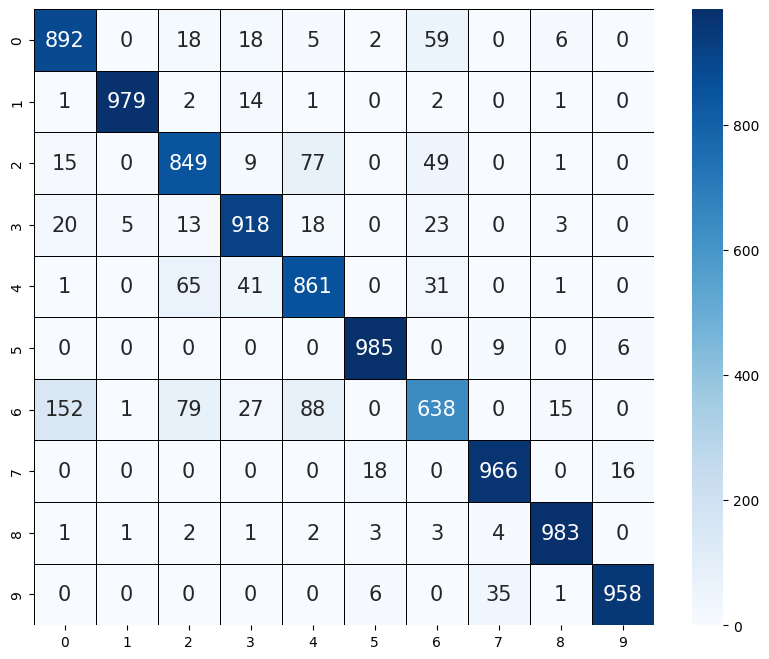

In [133]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_test, y_pred2),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()
# heat map of confusion matrix

How many mistakes for Model 2?

In [115]:
np.not_equal(y_test, y_pred2).sum()#how many mistakes the model did
# Model 2 has more mistakes than model1

971

In [134]:
# The correct prediction
np.equal(y_test, y_pred2).sum()#not mistake

9029

# **Model with Dropout and 2 Conv2D layer**

In [121]:
model3 = Sequential()

model3.add( Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))  # stride = 1, padding = valid
model3.add(MaxPool2D(pool_size=(2, 2)))  # stride = pool size, padding = valid --> no padding


model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Flatten())# flatten the output and make it ready for the next layer

model3.add(Dense(128, activation="relu"))
model3.add(Dropout(0.6))# dropout

model3.add(Dense(10, activation="softmax"))#ouput layer have 10 different neurons represent the 10 different labels of the dataset
#, softmax to find which label it's

model3.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
#multiclass --> loss="categorical_crossentropy"

In [122]:
model3.fit(
    x_train,
    Y_train_cat,
    batch_size=64,
    epochs=100,
    validation_data=(x_val,Y_val_cat),
    callbacks=[early_stop],
)
#early stopping at 16 epochs

Epoch 1/100
844/844 [==============================] - 5s 5ms/step - loss: 0.6178 - accuracy: 0.7791 - val_loss: 0.3592 - val_accuracy: 0.8710
Epoch 2/100
844/844 [==============================] - 5s 5ms/step - loss: 0.4035 - accuracy: 0.8576 - val_loss: 0.3128 - val_accuracy: 0.8855
Epoch 3/100
844/844 [==============================] - 4s 5ms/step - loss: 0.3505 - accuracy: 0.8773 - val_loss: 0.2755 - val_accuracy: 0.8990
Epoch 4/100
844/844 [==============================] - 4s 5ms/step - loss: 0.3209 - accuracy: 0.8869 - val_loss: 0.2593 - val_accuracy: 0.9055
Epoch 5/100
844/844 [==============================] - 5s 6ms/step - loss: 0.3009 - accuracy: 0.8950 - val_loss: 0.2467 - val_accuracy: 0.9092
Epoch 6/100
844/844 [==============================] - 4s 5ms/step - loss: 0.2877 - accuracy: 0.9000 - val_loss: 0.2475 - val_accuracy: 0.9105
Epoch 7/100
844/844 [==============================] - 4s 5ms/step - loss: 0.2736 - accuracy: 0.9033 - val_loss: 0.2399 - val_accuracy: 0.9115

In [123]:
summary = pd.DataFrame(model3.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.617769,0.779093,0.359235,0.871000
1,0.403501,0.857574,0.312794,0.885500
2,0.350451,0.877333,0.275470,0.899000
3,0.320910,0.886944,0.259255,0.905500
4,0.300900,0.895000,0.246671,0.909167


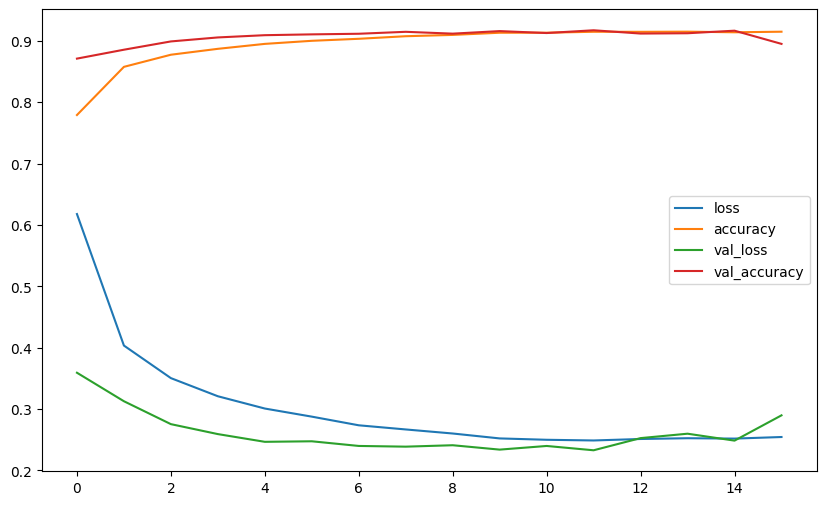

In [124]:
summary.plot();
# The accuracy very high with one conv2D layer ftom the begining
# There is a little overfitting at the last epochs
# we can over come this overfitting by change the patience of early stopping to 2

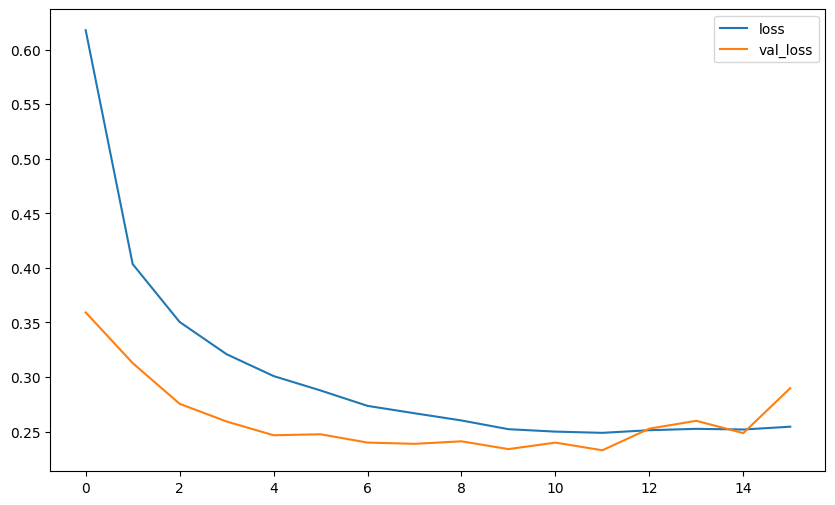

In [181]:
summary[["loss", "val_loss"]].plot();

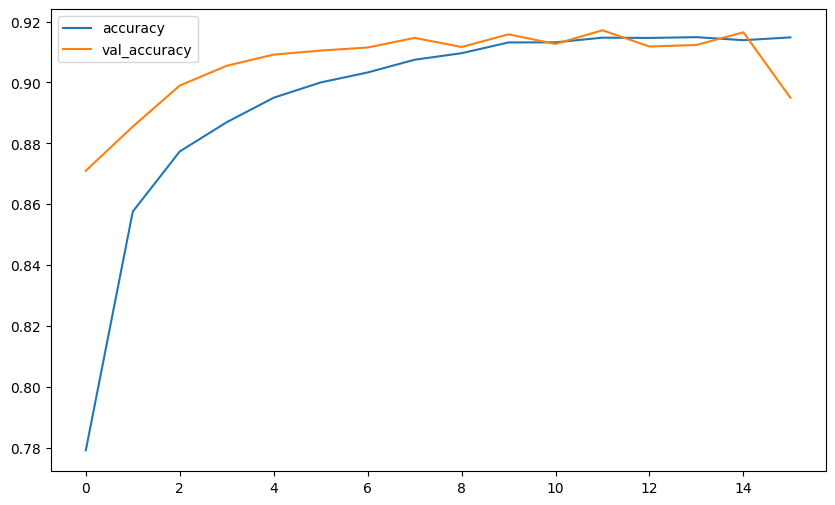

In [182]:
summary[["accuracy", "val_accuracy"]].plot();

**`Model Evaluation`**

In [126]:
# Evaluate the model on the test set
model3.evaluate(x_test, Y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.2826 - accuracy: 0.9066


[0.2826368510723114, 0.9065999984741211]

In [127]:
pred_prob3 = model3.predict(x_test)
pred_prob3
# the probability is in 10 digits

313/313 [==============================] - 1s 2ms/step


array([[8.46946735e-10, 2.18186336e-09, 1.46404333e-09, ...,
        3.52093252e-06, 3.01360110e-08, 9.99994278e-01],
       [2.03234296e-09, 6.57196806e-20, 9.99999642e-01, ...,
        4.47273935e-22, 1.61412007e-15, 2.80125878e-19],
       [4.34869979e-12, 1.00000000e+00, 6.42042436e-14, ...,
        1.83560870e-15, 3.19838611e-13, 9.14744693e-14],
       ...,
       [3.01526137e-09, 2.22599161e-13, 7.40209505e-10, ...,
        5.11501735e-12, 1.00000000e+00, 3.40654978e-12],
       [1.43124745e-09, 1.00000000e+00, 1.37416445e-12, ...,
        2.05135735e-12, 5.70113358e-12, 3.21887898e-11],
       [2.13411142e-04, 9.00857442e-04, 6.76230993e-04, ...,
        3.08110695e-02, 1.16046555e-02, 3.20551172e-03]], dtype=float32)

In [128]:
y_pred3 = np.argmax(pred_prob3, axis=1)# to get the actual class of the probabilities
y_pred3

array([9, 2, 1, ..., 8, 1, 5])

Classification Report

In [129]:
print(classification_report(y_test, y_pred3))
# good Results
# the lowest Recall is 73 for label 6

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.83      0.86      1000
           3       0.91      0.90      0.90      1000
           4       0.83      0.88      0.85      1000
           5       0.97      0.99      0.98      1000
           6       0.72      0.73      0.72      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Confusion Matrix

In [130]:
print(confusion_matrix(y_test, y_pred3))
# there are misclassified for the label  6

[[860   0  14  17   4   2  99   0   4   0]
 [  0 977   0  13   2   0   6   0   2   0]
 [ 18   0 834   7  62   0  79   0   0   0]
 [ 13   8  12 901  27   0  39   0   0   0]
 [  1   0  37  28 875   0  59   0   0   0]
 [  0   0   0   0   0 988   0   9   0   3]
 [114   0  47  23  76   1 728   0  11   0]
 [  0   0   0   0   0  16   0 959   0  25]
 [  1   0   3   3   6   4   2   1 980   0]
 [  0   0   0   0   0   5   0  30   1 964]]


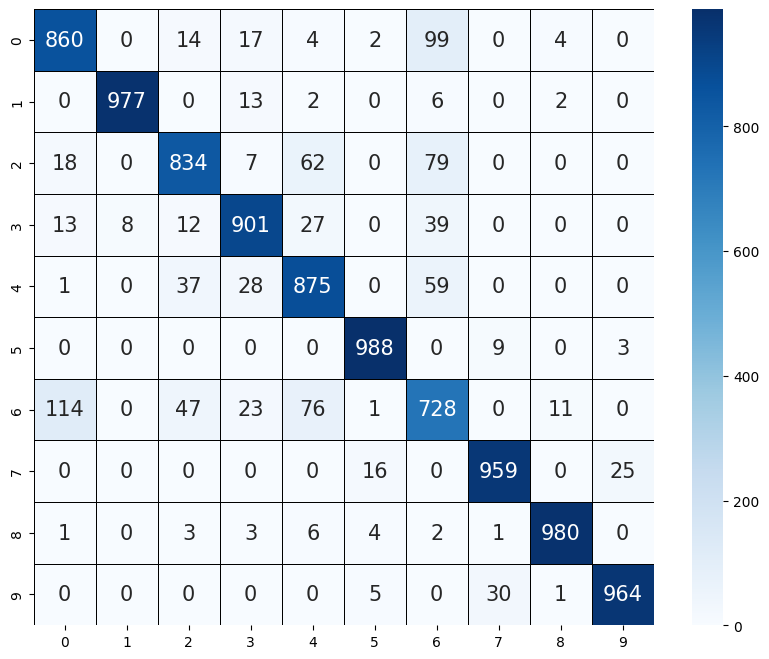

In [136]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_test, y_pred3),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()
# heat map of confusion matrix

In [131]:
np.not_equal(y_test, y_pred3).sum()#how many mistakes the model did
# Model 3 has less mistakes than model2

934

In [137]:
# The correct prediction
np.equal(y_test, y_pred3).sum()#not mistake

9066

**Model Comparison**


1.   **Model 1 :** Accuracy = 0.91 , No of Mistakes = 900 , Has Overfitting
2.   **Model 2 :** Accuracy =  0.90  , No of Mistakes = 971 ,NO Overfitting
1.   **Model 3 :** Accuracy =    0.91 , No of Mistakes = 934 , NO Overfitting


Final Decision :  choose the model with the best Accuracy smallest mistakes and with NO Overfitting

**BEST MODEL : Third MODEL 3**

## Prediction

In [145]:
my_test = x_test[400]#predict on data point from the test set

In [176]:
my_test.shape

(28, 28, 1)

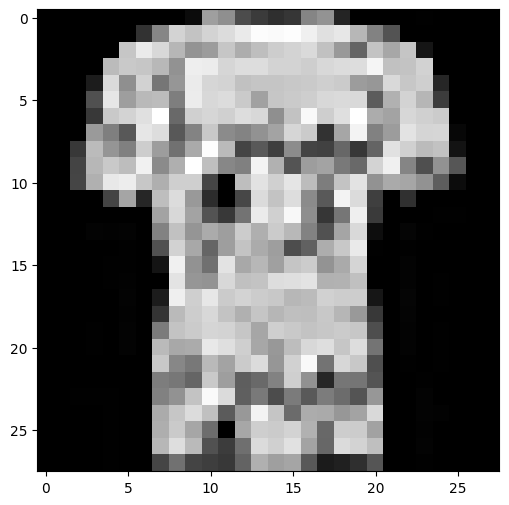

In [177]:
plt.imshow(my_test, cmap="gray")
plt.show()
#how will it look like

In [150]:
np.expand_dims(my_test, 0).shape#expand dimension

(1, 28, 28, 1)

In [178]:
pred_prob = model3.predict(np.expand_dims(my_test, 0))
pred_prob
#predict and we see the highest number is 0

1/1 [==============================] - 0s 89ms/step


array([[9.9718696e-01, 2.2522196e-08, 1.3647662e-05, 1.2461335e-05,
        7.1842474e-09, 2.2506723e-09, 2.7867835e-03, 1.5356007e-10,
        9.3309374e-08, 1.2101193e-09]], dtype=float32)

In [179]:
y_pred = np.argmax(pred_prob)
y_pred

0

In [173]:
pred = model.predict(np.expand_dims(x_test[5000], 0))#pick another point from test se
# and expand it to have the representation of the number of channel

1/1 [==============================] - 0s 20ms/step


In [174]:
np.argmax(pred)# to see the label of the individual image

1

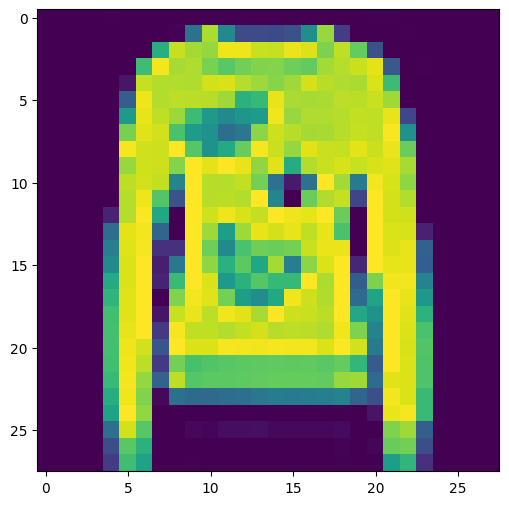

In [175]:
plt.imshow(x_test[5000].reshape(28, 28))
plt.show()#plot image

In [180]:
model3.save("CNN.h5")#save model so it easy to predict new datapoint

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___